# Data-Analysis of the CheXpert and MIMIC-CXR datasets

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
labeler = 'chexbert'
# labeler = 'chexpert'

In [3]:
mimic_reports = pd.read_csv('../data_msc_project/data/mimic/mimic_reports.csv')
# Remove the 's' from the study_id
mimic_reports['study_id'] = mimic_reports['study_id'].str[1:]
mimic_labels = pd.read_csv(f'../data_msc_project/data/mimic/mimic_labels({labeler}).csv')

chexpert_reports = pd.read_csv('../data_msc_project/data/chexpert/chexpert_reports.csv')
chexpert_labels = pd.read_csv(f'../data_msc_project/data/chexpert/chexpert_labels({labeler}).csv')

balanced_reports = pd.read_csv('../data_msc_project/data/balanced/balanced_reports.csv')
balanced_labels = pd.read_csv('../data_msc_project/data/balanced/balanced(chexbert).csv')

test_reports = pd.read_csv('../data_msc_project/data/test/test_reports.csv')
test_labels = pd.read_csv('../data_msc_project/data/test/test_labels.csv')

print(mimic_reports.shape)
print(mimic_labels.shape)
print(chexpert_reports.shape)
print(chexpert_labels.shape)
print(test_reports.shape)
print(test_labels.shape)

# Count number of -1, 0, 1 in Edema for mimic_labels
edema = chexpert_labels['Edema'].value_counts()
print(edema)


(227835, 2)
(227835, 15)
(223228, 2)
(223228, 15)
(685, 2)
(687, 15)
 1.0    52965
 0.0    21208
-1.0    12204
Name: Edema, dtype: int64


In [4]:
# Define the function to process the DataFrames
def process_labels(df):
    # Replace NaN values with 2
    df = df.fillna(2)
    
    # Rename 'Enlarged Cardiomediastinum' column to 'Enlarged Cardio.'
    df.rename(columns={'Enlarged Cardiomediastinum': 'Enlarged Cardio.'}, inplace=True)
    df.rename(columns={'Airspace Opacity': 'Lung Opacity'}, inplace=True)
    
    return df

# Assuming mimic_labels, chexpert_labels, and test_labels are defined as pandas DataFrames
mimic_labels = process_labels(mimic_labels)
chexpert_labels = process_labels(chexpert_labels)
balanced_labels = process_labels(balanced_labels)
test_labels = process_labels(test_labels)


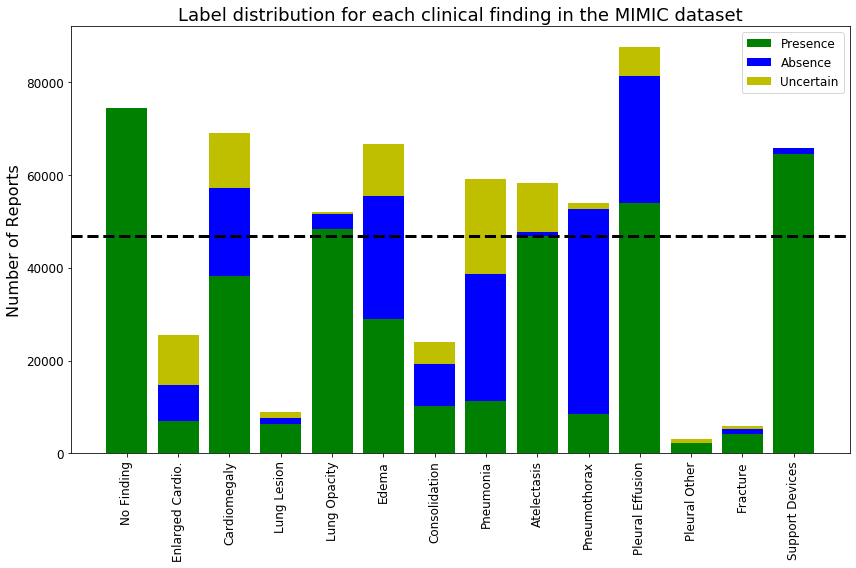

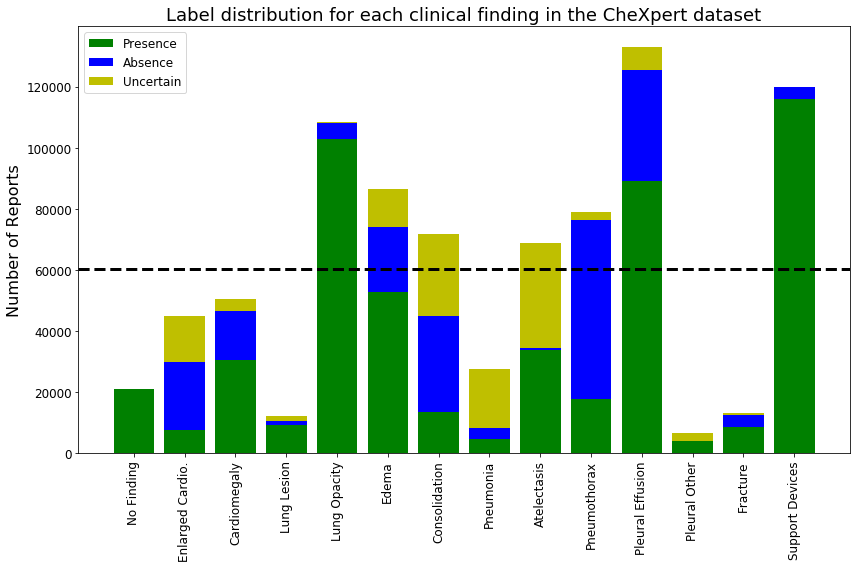

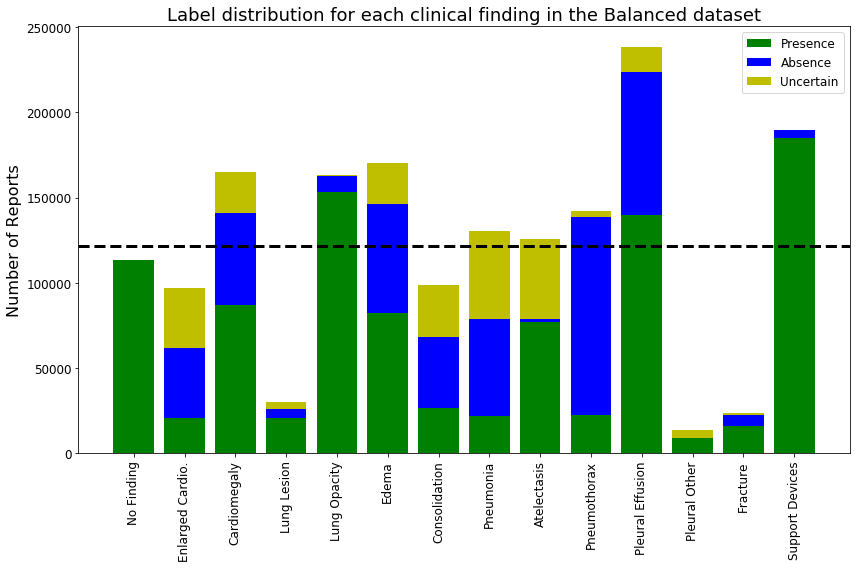

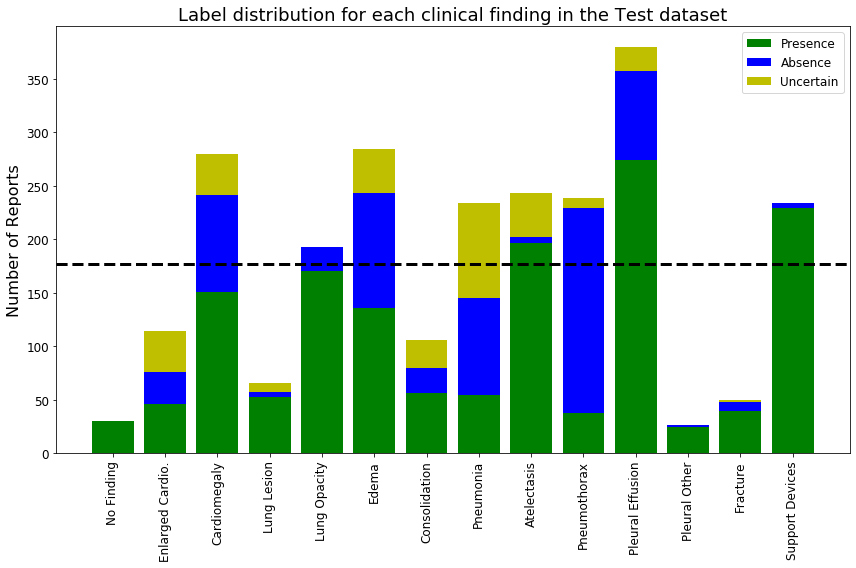

In [16]:
# Define the function to compute counts
def compute_counts(df):
    mention_count = df[df != 2].count()
    presence_count = df[df == 1].count()
    absence_count = df[df == 0].count()
    uncertain_count = df[df == -1].count()
    
    # Remove 'study_id' from the counts
    if 'study_id' in mention_count:
        mention_count = mention_count.drop('study_id')
        presence_count = presence_count.drop('study_id')
        absence_count = absence_count.drop('study_id')
        uncertain_count = uncertain_count.drop('study_id')

    if 'Report Impression' in mention_count:
        mention_count = mention_count.drop('Report Impression')
        presence_count = presence_count.drop('Report Impression')
        absence_count = absence_count.drop('Report Impression')
        uncertain_count = uncertain_count.drop('Report Impression')
    
    desired_order = [
    'No Finding', 'Enlarged Cardio.', 'Cardiomegaly', 'Lung Lesion',
    'Lung Opacity', 'Edema', 'Consolidation', 'Pneumonia', 'Atelectasis',
    'Pneumothorax', 'Pleural Effusion', 'Pleural Other', 'Fracture', 'Support Devices']
    
    # Reorder the mention_count, presence_count, absence_count, uncertain_count to match the desired order
    mention_count = mention_count.reindex(desired_order)
    presence_count = presence_count.reindex(desired_order)
    absence_count = absence_count.reindex(desired_order)
    uncertain_count = uncertain_count.reindex(desired_order)

    
    return mention_count, presence_count, absence_count, uncertain_count

# Define the function to plot the results
# def plot_counts(mention_count, presence_count, absence_count, uncertain_count, dataset):

#     N = len(mention_count)
#     ind = np.arange(N)
#     width = 0.4  # Width of the bars

#     # Set a larger figure size
#     fig, ax = plt.subplots(figsize=(12, 8))  # Adjust the size as needed (width, height)

#     # Plot mention bars
#     mention_bars = ax.bar(ind, mention_count, width, color='r', label='Mention')

#     # Plot stacked bars for presence, absence, and uncertain
#     presence_bars = ax.bar(ind + width, presence_count, width, color='g', label='Presence')
#     absence_bars = ax.bar(ind + width, absence_count, width, bottom=presence_count, color='b', label='Absence')
#     uncertain_bars = ax.bar(ind + width, uncertain_count, width, bottom=presence_count + absence_count, color='y', label='Uncertain')

#     # Set larger font sizes
#     ax.set_ylabel('Number of Reports', fontsize=16)
#     ax.set_title('Label distribution for each clinical finding in the ' + dataset + ' dataset', fontsize=18)
#     ax.set_xticks(ind + width / 2)
#     ax.set_xticklabels(mention_count.index, fontsize=12)
#     ax.legend(fontsize=12)

#     ########################################
#     # Average of mention_count
#     avg = mention_count.mean()
    
#     # Horizontal dotted line at 5000
#     ax.axhline(y=60000, color='black', linestyle='--', linewidth=3)
#     ########################################

#     # Make the labels vertical with larger font size
#     plt.xticks(rotation=90, fontsize=12)
#     plt.yticks(fontsize=12)

#     # Adjust layout to make sure labels are not cut off
#     plt.tight_layout()  # Adjusts the padding between and around subplots

#     # Save the figure and ensure the whole plot is included
#     # plt.savefig('plots/label_distribution_' + dataset + '.png', bbox_inches='tight')

#     # plt.show()

def plot_counts(mention_count, presence_count, absence_count, uncertain_count, dataset):

    N = len(presence_count)
    ind = np.arange(N)
    width = 0.8  # Width of the bars

    # Set a larger figure size
    fig, ax = plt.subplots(figsize=(12, 8))  # Adjust the size as needed (width, height)

    # Plot stacked bars for presence, absence, and uncertain at the same positions
    presence_bars = ax.bar(ind, presence_count, width, color='g', label='Presence')
    absence_bars = ax.bar(ind, absence_count, width, bottom=presence_count, color='b', label='Absence')
    uncertain_bars = ax.bar(ind, uncertain_count, width, bottom=presence_count + absence_count, color='y', label='Uncertain')

    # Set larger font sizes
    ax.set_ylabel('Number of Reports', fontsize=16)
    ax.set_title('Label distribution for each clinical finding in the ' + dataset + ' dataset', fontsize=18)
    ax.set_xticks(ind)
    ax.set_xticklabels(presence_count.index, fontsize=12)
    ax.legend(fontsize=12)

    ########################################
    avg = mention_count.mean()
    # Horizontal dotted line at 60000
    ax.axhline(y=avg, color='black', linestyle='--', linewidth=3)
    ########################################

    # Make the labels vertical with larger font size
    plt.xticks(rotation=90, fontsize=12)
    plt.yticks(fontsize=12)

    # Adjust layout to make sure labels are not cut off
    plt.tight_layout()  # Adjusts the padding between and around subplots



# Process mimic_labels
mention_count, presence_count, absence_count, uncertain_count = compute_counts(mimic_labels)
plot_counts(mention_count, presence_count, absence_count, uncertain_count, 'MIMIC')

# Process chexpert_labels
mention_count, presence_count, absence_count, uncertain_count = compute_counts(chexpert_labels)
plot_counts(mention_count, presence_count, absence_count, uncertain_count, 'CheXpert')

# Process balanced_labels
mention_count, presence_count, absence_count, uncertain_count = compute_counts(balanced_labels)
plot_counts(mention_count, presence_count, absence_count, uncertain_count, 'Balanced')

# Process test_labels
mention_count, presence_count, absence_count, uncertain_count = compute_counts(test_labels)
plot_counts(mention_count, presence_count, absence_count, uncertain_count, 'Test')

In [19]:
chexbert_reports = pd.read_csv('../data_msc_project/cheXbert/input_chexbert.csv')
chexbert_labels = pd.read_csv('../data_msc_project/cheXbert/chexbert_labeled_1.csv')

study_ids = pd.read_csv('../data_msc_project/eval_set/ordered_test_ids.csv')

# Remove first column from chexbert_labels and add study_id
chexbert_labels = chexbert_labels.iloc[:, 1:]
chexbert_labels['study_id'] = study_ids

print(chexbert_reports.shape)
print(chexbert_labels.shape)

(685, 1)
(685, 15)


In [20]:
# Find study_id's in test set with 1 and 0 for 'Pleural Other'
pleural_other_test = test_labels[(test_labels['Pleural Other'] == 1 ) | (test_labels['Pleural Other'] == 0)]
pleural_other_chexbert = chexbert_labels[(chexbert_labels['Pleural Other'] == 1 ) | (chexbert_labels['Pleural Other'] == 0)]

# Find mismatched study_id's
mismatched_study_ids = pleural_other_test[pleural_other_test['study_id'].isin(pleural_other_chexbert['study_id']) == False]['study_id']
print(mismatched_study_ids)



70     50331901
177    56372001
190    57848354
205    59155076
284    53128548
315    52246418
319    54097861
469    51731956
491    59197220
598    58503033
664    55677495
684    53225437
Name: study_id, dtype: int64
